# File IO with CSV

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/enactdev/CISC_106_F18/master?filepath=guides/file_io_raw_and_csv.ipynb)

**There are three steps to reading a file:**
* **Open the file**
* **Read file contents**
    * **Read entire file, or line by line**
* **Close the file**

**You will open the file with the `open()` function:**

### Open the file 

**Use 'r' for reading (common options: 'w' for writing to an existing file and overwriting the contents, 'a' for apending to an existing file, and 'x' for creating a new file)**

In [1]:
f = open('../data_files/us_census_population.csv', 'r')

### Read file contents

**Read the entire file with the `read()` method:**

In [2]:
# Do not run this cell twice in a row. If you need to re-run it, you also need to re-run
# the cell above that opens the file.
file_contents = f.read()

# Only look at the first 50 characters
print(file_contents[:50])

Year,Population
1790,3929326
1800,5308483
1810,723


### Close the file

**Close the file with the `close()` method:**

In [3]:
f.close()

**You can also read the file line by line:**

In [4]:
f = open('../data_files/us_census_population.csv', 'r')

current_line = 0
for line in f:
    current_line += 1
    #print('current line number:', current_line)
    print('type(line):', type(line))
    if current_line >= 5:
        break
        
    print(line)

    
f.close()

type(line): <class 'str'>
Year,Population

type(line): <class 'str'>
1790,3929326

type(line): <class 'str'>
1800,5308483

type(line): <class 'str'>
1810,7239881

type(line): <class 'str'>


**Let's parse the file with the string `split()` method.**

In [5]:
f = open('../data_files/us_census_population.csv', 'r')

current_line = 0
for line in f:
    current_line += 1
    line_data = line.split(',')
    print(line_data)
    
    if current_line >= 5:
        break
    
f.close()

['Year', 'Population\n']
['1790', '3929326\n']
['1800', '5308483\n']
['1810', '7239881\n']
['1820', '9638453\n']


**You can read a single line with the `next()` function.**

In [6]:
f = open('../data_files/us_census_population.csv', 'r')

first_line = next(f)   # skip the first line

print(first_line)

f.close()

Year,Population



In [7]:
f = open('../data_files/us_census_population.csv', 'r')

first_line = next(f)   # skip the first line

print(first_line)

year_list = []
population_list = []

current_line = 1
for line in f:
    current_line += 1
    line_data = line.split(',')
    #print(line_data)

    #if current_line >= 5:
    #    break
        
    year_list.append(line_data[0])
    population_list.append(line_data[1].strip())

print('years:', year_list)
print('population:', population_list)
    
f.close()

Year,Population

years: ['1790', '1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
population: ['3929326', '5308483', '7239881', '9638453', '12866020', '17069453', '23191876', '31443321', '39818449', '50189209', '62947714', '76212168', '92228496', '106021537', '122775046', '132164569', '150697361', '179323175', '203302031', '226545805', '248709873', '281421906', '308745538']


## CSV files

**Files have lines, which should make sense. CSV files also have lines, but since CSV files are often imported into a spreadsheet program, the lines are often called rows.**

**Note: You can also use the `next()` function on the CSV header row**


In [8]:
import csv

help(csv.reader)

Help on built-in function reader in module _csv:

reader(...)
    csv_reader = reader(iterable [, dialect='excel']
                            [optional keyword args])
        for row in csv_reader:
            process(row)
    
    The "iterable" argument can be any object that returns a line
    of input for each iteration, such as a file object or a list.  The
    optional "dialect" parameter is discussed below.  The function
    also accepts optional keyword arguments which override settings
    provided by the dialect.
    
    The returned object is an iterator.  Each iteration returns a row
    of the CSV file (which can span multiple input lines).



In [9]:
f = open('../data_files/us_census_population.csv', 'r')

csvreader = csv.reader(f) #, delimiter=',', quotechar='"'

first_row = next(csvreader)   # skip the first line

print('first_row:', first_row)

year_list = []
population_list = []

current_line = 1

for row in csvreader:
    current_line += 1
    
    print(row)

    #if current_line >= 5:
    #    break

    year_list.append(row[0])
    population_list.append(row[1].strip())

print('years:', year_list)
print('population:', population_list)

    
f.close()

first_row: ['Year', 'Population']
['1790', '3929326']
['1800', '5308483']
['1810', '7239881']
['1820', '9638453']
['1830', '12866020']
['1840', '17069453']
['1850', '23191876']
['1860', '31443321']
['1870', '39818449']
['1880', '50189209']
['1890', '62947714']
['1900', '76212168']
['1910', '92228496']
['1920', '106021537']
['1930', '122775046']
['1940', '132164569']
['1950', '150697361']
['1960', '179323175']
['1970', '203302031']
['1980', '226545805']
['1990', '248709873']
['2000', '281421906']
['2010', '308745538']
years: ['1790', '1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
population: ['3929326', '5308483', '7239881', '9638453', '12866020', '17069453', '23191876', '31443321', '39818449', '50189209', '62947714', '76212168', '92228496', '106021537', '122775046', '132164569', '150697361', '179323175', '203302031', '226545805', '248709873', '281421906', '30

**Let's make a bar chart. Here is the example used:**

https://pythonspot.com/matplotlib-bar-chart/

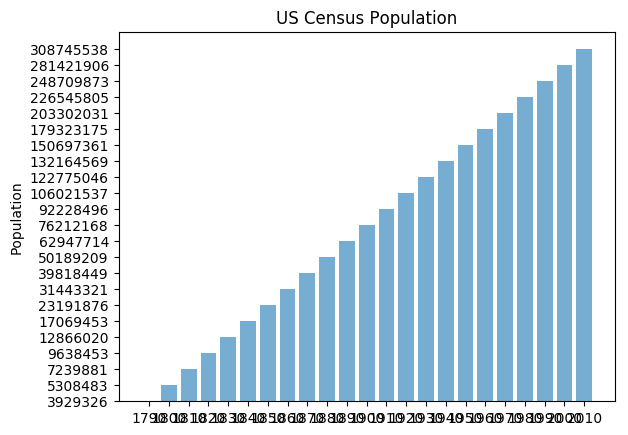

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(year_list))
 
plt.bar(y_pos, population_list, align='center', alpha=0.6)
plt.xticks(y_pos, year_list)
plt.ylabel('Population')
plt.title('US Census Population')
 
# Removed the .show() method
plt.show()

### Let's create a json file

**To do that, let's create a list of dictionaries.**

In [11]:
f = open('../data_files/us_census_population.csv', 'r')

csvreader = csv.reader(f) #, delimiter=',', quotechar='"'

first_row = next(csvreader)   # skip the first line

print('first_row:', first_row)

data_list = []

current_line = 1

for row in csvreader:
    current_line += 1
    
    line_dict = {'year': row[0], 'population': row[1]}

    data_list.append(line_dict)

print('data_list:', data_list)

    
f.close()

first_row: ['Year', 'Population']
data_list: [{'year': '1790', 'population': '3929326'}, {'year': '1800', 'population': '5308483'}, {'year': '1810', 'population': '7239881'}, {'year': '1820', 'population': '9638453'}, {'year': '1830', 'population': '12866020'}, {'year': '1840', 'population': '17069453'}, {'year': '1850', 'population': '23191876'}, {'year': '1860', 'population': '31443321'}, {'year': '1870', 'population': '39818449'}, {'year': '1880', 'population': '50189209'}, {'year': '1890', 'population': '62947714'}, {'year': '1900', 'population': '76212168'}, {'year': '1910', 'population': '92228496'}, {'year': '1920', 'population': '106021537'}, {'year': '1930', 'population': '122775046'}, {'year': '1940', 'population': '132164569'}, {'year': '1950', 'population': '150697361'}, {'year': '1960', 'population': '179323175'}, {'year': '1970', 'population': '203302031'}, {'year': '1980', 'population': '226545805'}, {'year': '1990', 'population': '248709873'}, {'year': '2000', 'populati

**Now let's write this to a file:**

In [12]:
import json

f = open('../data_files/us_census_population.json', 'w')

f.write(json.dumps(data_list))
    
f.close()